In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter as fsf
from plots.mpltoolkit import mpl_loc, load_mpl_presets
import numpy as np
import vice
import sys
import os
sys.path.append("%s/Work/Research/VICErepos/VICE/migration" % (os.environ["HOME"]))
from src.plots.plots.age_ofe import plot_relation
from src.plots.plots.amr.galactic_regions import feuillet2019_amr, plot_amr, median_ages
load_mpl_presets()

/Users/jamesjohnson/Work/Research/VICErepos/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [2]:
output = vice.output("./outputs/diffusion/insideout")
extra = np.genfromtxt("%s_analogdata.out" % (output.name))
output.stars["abszfinal"] = [abs(_) for _ in extra[:,-1]][:output.stars.size[0]]

/var/folders/mh/jf6nfbl941l_41vvvwwk5wbr0000gn/T/ipykernel_44134/1444224913.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


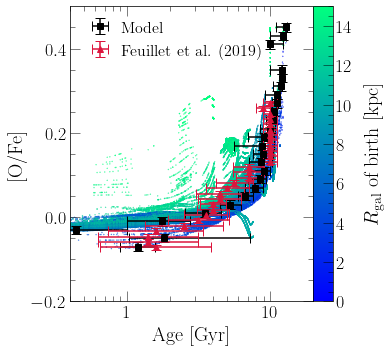

In [3]:
fig = plt.figure(figsize = (5.5, 5), facecolor = "white")
ax = fig.add_subplot(111)
ax.set_xlabel(r"Age [Gyr]")
ax.set_ylabel("[O/Fe]")
ax.set_xscale("log")
ax.set_xlim([0.4, 20])
ax.xaxis.set_major_formatter(fsf("%g"))
ax.set_ylim([-0.2, 0.5])
ax.set_yticks([-0.2, 0, 0.2, 0.4])

sc = plot_relation(ax, output, label = True)
feuillet2019_amr(ax, "O", "Fe", 7, 9, 0, 0.5, label = True)
cbar_ax = fig.add_axes([0.92, 0.05, 0.02, 0.95])
cbar = plt.colorbar(sc, cax = cbar_ax, pad = 0.0, orientation = "vertical")
cbar.set_label(r"$R_\text{gal}$ of birth [kpc]", labelpad = 10)
cbar.set_ticks(range(0, 16, 2))

kwargs = {
    "loc": mpl_loc("upper left"),
    "ncol": 1,
    "fontsize": 16
}
ax.legend(**kwargs)

plt.tight_layout()
plt.subplots_adjust(right = 0.8)
cbar_ax.set_position([
    ax.get_position().x1,
    ax.get_position().y0,
    0.05,
    ax.get_position().y1 - ax.get_position().y0
])
plt.savefig("./images/age-ofe.pdf")
plt.show()

/var/folders/mh/jf6nfbl941l_41vvvwwk5wbr0000gn/T/ipykernel_44134/1482896348.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


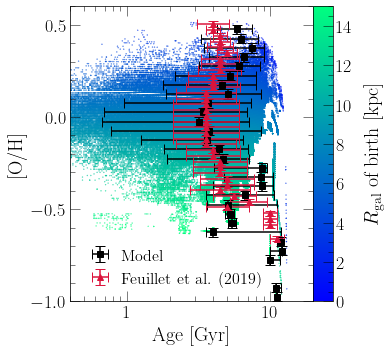

In [5]:
fig = plt.figure(figsize = (5.5, 5), facecolor = "white")
ax = fig.add_subplot(111)
ax.set_xlabel(r"Age [Gyr]")
ax.set_ylabel(r"[O/H]")
ax.set_xscale("log")
ax.set_xlim([0.4, 20])
ax.xaxis.set_major_formatter(fsf("%g"))
ax.set_ylim([-1, 0.6])
ax.set_yticks([-1, -0.5, 0, 0.5])

sc = plot_amr(ax, "O", "H", output, 7, 9, 0, 0.5)
median_ages(ax, "O", "H", output, 7, 9, 0, 0.5, label = True)
feuillet2019_amr(ax, "O", "H", 7, 9, 0, 0.5, label = True)
cbar_ax = fig.add_axes([0.92, 0.05, 0.02, 0.95])
cbar = plt.colorbar(sc, cax = cbar_ax, pad = 0.0, orientation = "vertical")
cbar.set_label(r"$R_\text{gal}$ of birth [kpc]", labelpad = 10)
cbar.set_ticks(range(0, 16, 2))

kwargs = {
    "loc": mpl_loc("lower left"),
    "ncol": 1,
    "fontsize": 16
}
ax.legend(**kwargs)

plt.tight_layout()
plt.subplots_adjust(right = 0.8)
cbar_ax.set_position([
    ax.get_position().x1,
    ax.get_position().y0,
    0.05,
    ax.get_position().y1 - ax.get_position().y0
])
plt.savefig("./images/age-oh.pdf")
plt.show()